# Tarea 1 - Reviews Beers

### Descripción Dataset Beer Reviews
 
El dataset Beer Reviews entrega 1.586.613 reseñas de cervezas del sitio  [BeerAdvocate](https://www.beeradvocate.com/beer/ "BeerAdvocate"). Dentro del dataset entregado (sin la columna *reseña*) se encuentran los siguientes datos: 

* brewery_id: Identificador cervecería 
* **brewery_name**: Nombre cervecería.
* review_time: Timestamp en que se realizó la reseña.
* **review_overall**: Calificación general de la reseña.
* **review_aroma**: Calificación de la reseña respecto al aroma. 
* **review_appearance**: Calificación de la reseña respecto a la apariencia.
* review_profilename: Nombre de usuario que realizó la reseña.
* **beer_style**: Estilo/Tipo de cerveza.
* **review_palate**: Calificación de la reseña respecto a la sensación que provoca en la boca.
* **review_taste**: Calificación de la reseña respecto al sabor.
* **beer_name**: Nombre cerveza.
* **beer_abv**: Porcentaje de alcohol por volumen de la cerveza (grado alcohólico).
* **beer_beerid**: Identidicador cerveza.


Solo trabajaremos con los datos destacados anteriormente, dado que estos son de interés para el análisis; los datos descartados (brewery_id, review_time, review_profilename y beer_beerid) no son de aporte al trabajo, ya que

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from time import time

read = pd.read_csv("beer_reviews/beer_reviews.csv")
read = read[["brewery_name", 
            "review_overall", 
            "review_aroma", 
            "review_appearance", 
            "beer_style", 
            "review_palate",
            "review_taste",
            "beer_name",
            "beer_abv"]]

#print read[:10]

#read = read[:10000]
reviews = read.as_matrix()

#print reviews[:10]
print len(reviews)

1586614


En primer lugar, se utilizará el método de K-Means para hacer cluster de los datos, haciendo un versus entre las diferentes características de las reseñas de cerveza. En un comienzo se dará *k=11* para comenzar a ajustar el parámetro. El *k* inicial de prueba es alto, dado que para este caso la cantidad de datos con los que se trabajan son bastantes. 

Tiempo promedio:  0.0480366150538 [s]


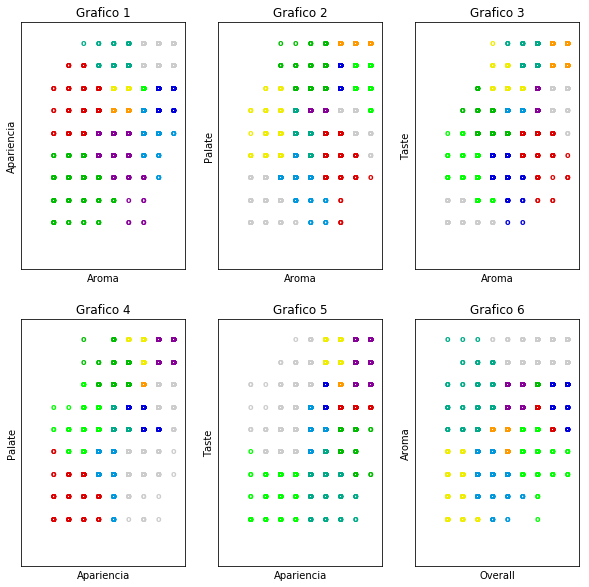

In [2]:
from sklearn.cluster import KMeans

n = 10000
data = [reviews[:int(n),[2,3]], reviews[:int(n),[2,5]], reviews[:int(n),[2,6]], 
        reviews[:int(n),[3,5]], reviews[:int(n),[3,6]], reviews[:int(n),[1,2]]]
labels =[["Aroma", "Apariencia"],["Aroma", "Palate"],["Aroma", "Taste"],
         ["Apariencia", "Palate"], ["Apariencia", "Taste"],["Overall", "Aroma"]]

tiempo = 0

#Vizualitation
fig = plt.figure(figsize = (10,10))

for X,i in zip(data, range(6)):
    start_time = time()

    k_means = KMeans( init="k-means++", n_clusters = 11, n_init = 2)#, tol=0.0001, max_iter=30)
    k_means.fit(X)

    final_time = time() - start_time
    tiempo += final_time
    k_means_labels = k_means.labels_
    
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    #X = (X - x_min) / (x_max - x_min)

    ax = fig.add_subplot(2,3,i+1)
    ax.set_xlabel(labels[i][0])
    ax.set_ylabel(labels[i][1])
    plt.title("Grafico "+ str(i+1) )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 5.5, 0, 5.5])

    #Visualitation (in 2D).
    
    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], "o",
        color=plt.cm.spectral(k_means_labels[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})

print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()

De los gráficos anteriores, es posible ver que son grillas con varios puntos sobrepuestos y de distintos colores. Esto se debe a que los datos con los cuales se está trabajando (los puntajes de las reviews) son datos discretos, pues varían en intervalos de *0.5* entre ellos, como se muestra a continuación. Por lo tanto, como los datos no son continuos y están todos dentro del mismo rango, ocurre el problema de la vista como grilla y con puntos sobrepuestos.


In [3]:
print "Conjunto de valores de reviews over_all"
asd = set()
for y in reviews[:,[1]]: #review over_all
    asd.add(y[0])
asd = list(asd)
asd.sort()
print asd

Conjunto de valores de reviews over_all
[0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


También existe el problema de que al ser tan grande la cantidad de reviews que deben ser analizados, las capacidades computacionales con las que contamos no nos permiten clusterizar el dataset en su totalidad, dado que cada vez que se intentaba, los computadores se quedaban sin memoria y el kernel de jupyter se detenía en medio del proceso, no tenía más recursos a los que recurrir para seguir el procesamiento de los datos.

Otro problema que logramos dimensionar fue el hecho de que al momento de ajustar los parámetros, como por ejemplo el *k* de k-means, resultó tremendamente complejo, pues la idea es representar en cada cluster una cervecería o  un tipo de cerveza. Al haber una amplia diversidad de tipos en estos ámbitos, es decir, una gran cantidad de cervecerías y tipos de cervezas entre todos los reviews (por ejemplo solo en los primeros *10.000* reviews existen *106* cervecerías y *201* tipos de cervezas)  querer representar eso mediante gráficos es confuso y complejo de entender.


In [4]:
a = set()
def create_set(x):
    return a.add(x[0])

list(map(create_set,reviews[:10000,[0]]))
print "Cantidad de cervecerias en las primeros 10000 reviews: " + str(len(a))
list(map(create_set,reviews[:10000,[4]]))
print "Cantidad de tipos de cervezas en las primeros 10000 reviews: " + str(len(a))

Cantidad de cervecerias en las primeros 10000 reviews: 106
Cantidad de tipos de cervezas en las primeros 10000 reviews: 201


Expuesto los problemas a los que nos enfrentamos, procedemos a explicar las mitigaciones que realizamos.

* Para el problema de las capacidades computacionales, decidimos trabajar con un subconjunto de datos (como se menciono anteriormente). 
* Para el problema de la amplia diversidad de tipos de cervezas y cervecerías, decidimos tomar algunas muestras de estos, es decir, los datos de *n* tipos de cervezas y *n* cervecerías. 

Por lo tanto, combinando ambas medidas de mitigación, a continuación se trabajará sobre dos muestras del dataset, una que contiene todos los datos de 5 tipos de cerveza y otra que posee todos los datos de 5 cervecerías.

Al hacer uso de estos subdatasets, surgió un problema en la columna "beer_abv", ya que algunos de sus valores eran *NaN* lo cual ocasionaba que el algoritmo PCA arrojara un error y dejáse de funcionar. Para solucionar este problema, luego de cargar los subdatasets se procede a eliminar las filas que posean *NaN* en la columna "beer_abv". 

Luego, se realiza la construcción de etiquetas, las cuales serán utilizadas en la elaboración de los gráficos, representando mediante números las respectivas cervecerías y tipos de cervezas.


In [5]:
#Muestreo 
read_beers = pd.read_csv("sub_dataset/5_beers.csv")
read_beers = read_beers[["brewery_name", 
            "review_overall", 
            "review_aroma", 
            "review_appearance", 
            "beer_style", 
            "review_palate",
            "review_taste",
            "beer_name",
            "beer_abv"]]

#print read[:10]
reviews_beers = read_beers.as_matrix()


read_beweries = pd.read_csv("sub_dataset/5_breweries.csv")
read_beweries = read_beweries[["brewery_name", 
            "review_overall", 
            "review_aroma", 
            "review_appearance", 
            "beer_style", 
            "review_palate",
            "review_taste",
            "beer_name",
            "beer_abv"]]





#Sacar valor NaN que arroja en beers


df = pd.DataFrame(read_beers)
df = df.dropna()
reviews_beers = df.as_matrix()


#Sacar valor NaN que arroja en breweries

df = pd.DataFrame(read_beweries)
df = df.dropna()
reviews_beweries = df.as_matrix()

    

    
#Construccion de etiquetas para breweries
breweries_labels = []
aux_label = -1
breweries = set()
for i in range(len(read_beweries['brewery_name'])):
    if (read_beweries['brewery_name'][i] not in breweries):
        aux_label+=1
    breweries.add(read_beweries['brewery_name'][i])
    breweries_labels.append(aux_label)


#Construccion de etiquetas para beers
beers_labels = [] 
aux_label = -1
beers = set()
for i in range(len(read_beers['beer_style'])):
    if (read_beers['beer_style'][i] not in beers):
        aux_label+=1
    beers.add(read_beers['beer_style'][i])
    beers_labels.append(aux_label)
labels = [beers_labels,breweries_labels]
print "listo"

listo


El otro problema que falta por solucionar, es el cómo trabajar con múltiples dimensiones. Para solucionar esto, se hace uso de PCA (Principal Component Analysis) con el fin de reducir la dimensionalidad de los datos a dos dimensiones para facilitar su análisis y poder utilizarlos en ciertos algoritmos como k-means, que sólo reciben como parámetros datos en dos dimensiones. Adicionalmente, al realizar esta transformación lineal, los datos se vuelven continuos, y por tanto se distribuyen con mayor libertad en el espacio, facilitando su visualización en los gráficos que se generarán a continuación.

In [6]:
#reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

#print reviews[:int(100),[1,2,3,5,6,8]]

pca = PCA(n_components=2)

x_beers = len(labels[0])
x_breweries= len(labels[1])

pca.fit(reviews_beers[:x_beers,[1,2,3,5,6,8]])
beers = pca.transform(reviews_beers[:x_beers,[1,2,3,5,6,8]])

pca.fit(reviews_beweries[:,[1,2,3,5,6,8]])
beweries = pca.transform(reviews_beweries[:,[1,2,3,5,6,8]])

data = [beers, beweries]
print "exito"

exito


## Algoritmos:

Una vez que el preprocesamiento de los datos esa listo para poder ser utilizados en la clusterización, se procede a ejecutar cada una de las técnicas:

### K-means

Es un algoritmo basado en prototipos.

Los parámetro utilizados por el algoritmo son los siguientes:

* n_clusters: indica el número de clusters a formar, así como el número de centroides para generar.
* init: indica el método de inicialización de las semillas.
* n_init: inica la cantidad de veces que k-means se ejecuta con diferentes semillas de centroide. Los resultados finales serán la mejor salida de n_init series consecutivas en términos de inercia.
* max_iter: indica el número máximo de iteraciones para una sola ejecución.



."k-means++" semilla distribuida simetricamente K-emans es sensible a con respecto a la elección de semillas (semilla al lanzas la primera vez, luego se va ajustando)

24145
23341
Tiempo promedio:  0.0505406459173 [s]


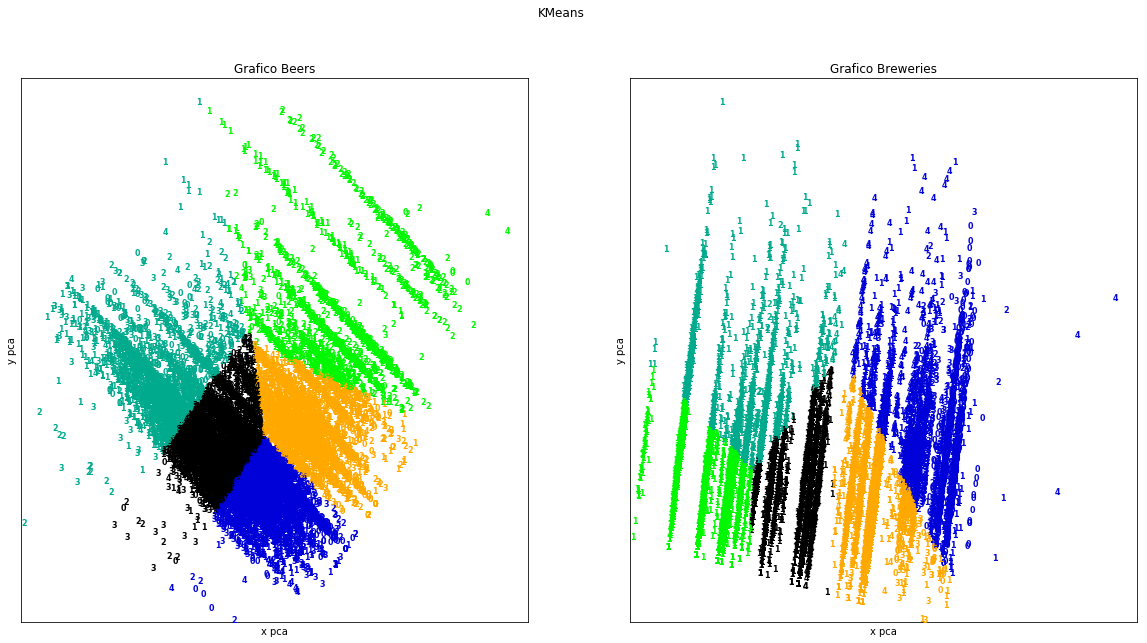

endplot


In [7]:
#K-MEANS
titles = ["Beers", "Breweries"]
tiempo = 0

#Vizualitation
fig = plt.figure(figsize = (20,10))
fig.suptitle('KMeans')

for X,i in zip(data, range(2)):
    print X.shape[0]
    start_time = time()

    k_means = KMeans(init="k-means++", n_clusters = 5, n_init = 2)#, tol=0.0001, max_iter=30) 5 
    k_means.fit(X)

    final_time = time() - start_time
    tiempo += final_time
    k_means_labels = k_means.labels_

    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)

    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title("Grafico " + titles[i])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 1.05, 0, 1.05])

    #Visualitation (in 2D).
    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], labels[i][j],
        color=plt.cm.spectral(k_means_labels[j]/5.1),
        fontdict={'weight': 'bold', 'size': 8})

print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()
print "endplot"

### Minibatch K-means

Es un algoritmo basado en prototipos.

Los parámetro utilizados por el algoritmo son los siguientes:

* n_clusters: indica el número de clusters a formar, así como el número de centroides para generar.
* init: indica el método de inicialización de las semillas.
* n_init: indica el número de inicializaciones que se intentan. En contraste con el método de K-Means, el algoritmo sólo se ejecuta una vez, utilizando la mejor de las n_init inicializaciones.
* batch_size: indica el tamaño de los mini batches
* max_no_improvement: permite controlar la detención, basándose en el número consecutivo de mini batches que no produce una mejora.
* reassignment_ratio: permite controla el número máximo de veces en que un centroide se va a reasignar. Un valor más alto significa que los centroides con pocos valores son reasignados más fácilmente, lo que significa que el modelo tomará más tiempo para converger, pero debe converger en mejores clusters.

Tiempo promedio:  0.0234351555506 [s]


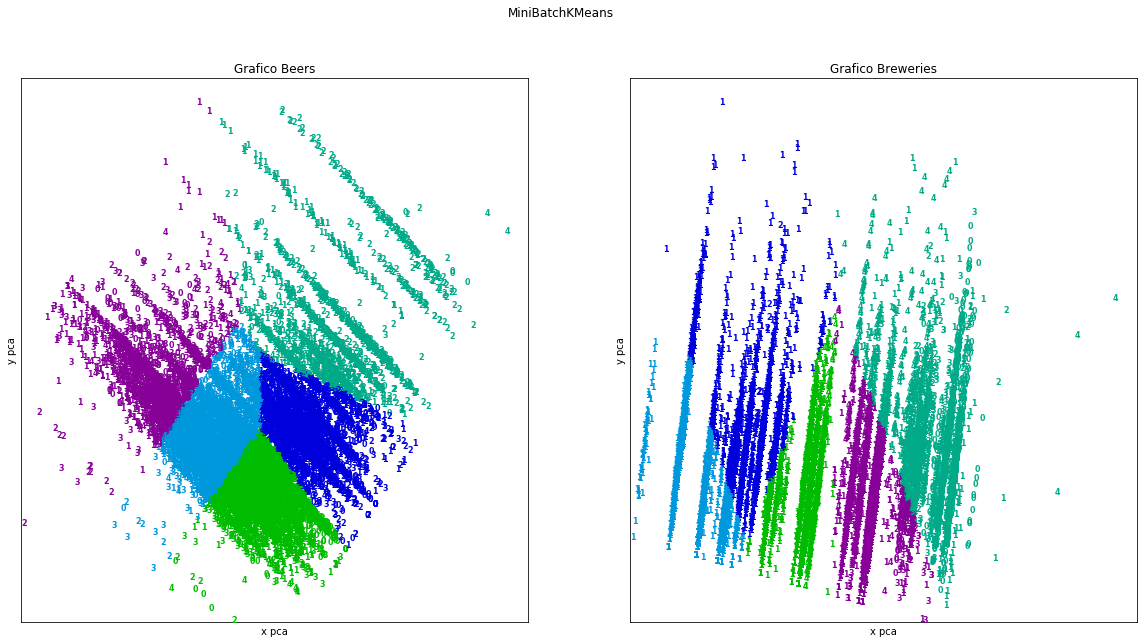

In [ ]:
#MINIBATCH K-MEANS
from sklearn.cluster import MiniBatchKMeans

tiempo = 0
#Vizualitation
fig = plt.figure(figsize = (20,10))
fig.suptitle('MiniBatchKMeans')

#Running K-Means
for X,i in zip(data, range(2)):
    start_time = time()
    #print X
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=5, n_init=10)#, max_no_improvement=20, batch_size=50, reassignment_ratio=0.2)
    mbk.fit(X)
    
    final_time = time() - start_time
    tiempo += final_time
    mbk_labels = mbk.labels_

    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title("Grafico " + titles[i] )
    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0, 1.05, 0, 1.05])

    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], labels[i][j],
        color=plt.cm.spectral(mbk_labels[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})


print "Tiempo promedio: ", tiempo/6,"[s]"
plt.show()

### Clustering Aglomerativo Jerarquico (HAC)

BEs un algoritmo basado en particiones.

Los parámetro utilizados por el algoritmo son los siguientes: 
* linkage: determina el criterio de vinculación (linkage a usar), las opciones son: {“ward”, “complete”, “average”}.
* n_clusters: indica el número de clusters a encontrar.
* affinity: indica em métdi utilizado para calcular la distancia.

# probar con cad tipo de distancia = single, complete, average y *ward*!!!

In [ ]:
#HAC
from sklearn.cluster import AgglomerativeClustering as hac
from scipy.cluster.hierarchy import dendrogram,linkage


fig = plt.figure(figsize = (20,10))
fig.suptitle('HAC')
y=range(5)
print y
tiempo=[]

for X,i in zip(data,range(2)):
    #Agglomerative Clustering
    start_time = time()	
    clustering = hac(linkage = "complete", n_clusters = 5, affinity="euclidean")
    clustering.fit(X)

    final_time = time() - start_time
    tiempo.append(final_time)

    HAC_labels = clustering.labels_

    #Normalization
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")

    plt.title( 'Grafico: ' + titles[i] )

    
    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], labels[i][j],
        color=plt.cm.spectral(clustering.labels_[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})
    

    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0,1.05,0,1.05])

print "Tiempo de ejecucion:", np.median(tiempo),"[s]"
plt.show()

#dendrograms for hac
fig = plt.figure(figsize = (20,10))
fig.suptitle('Dendrograms')
for X,i in zip(data,range(2)):
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title( 'Grafico: ' + titles[i] )
    
    #Building dendrogram
    Z = linkage(X,"complete")
    dendrogram(Z,leaf_rotation=90,leaf_font_size=1)
plt.show()
print "hghgh"

[0, 1, 2, 3, 4]


In [ ]:
#WARD


fig = plt.figure(figsize = (20,10))
fig.suptitle('WARD')

tiempo=[]
j=0


for X,i in zip(data,range(2)):
    #Agglomerative Clustering
    start_time = time()	
    clustering = hac(linkage = "ward", n_clusters = 5, affinity="euclidean")
    clustering.fit(X)

    final_time = time() - start_time
    tiempo.append(final_time)

    WARD_labels = clustering.labels_

    #Normalization
    x_min, x_max = np.min(X, axis = 0), np.max(X, axis = 0)
    X = (X - x_min) / (x_max - x_min)
    
    
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")

    plt.title( 'Grafico: ' + titles[i] )

    
    for j in range(X.shape[0]):
        plt.text(X[j,0], X[j,1], labels[i][j],
        color=plt.cm.spectral(clustering.labels_[j]/10.+0.1),
        fontdict={'weight': 'bold', 'size': 8})


    ax.set_xticks(())
    ax.set_yticks(())
    ax.axis([0,1.05,0,1.05])

print "Tiempo de ejecucion:", np.median(tiempo),"[s]"
plt.show()

#dendrograms for ward
fig = plt.figure(figsize = (20,10))
fig.suptitle('Dendrograms')
for X,i in zip(data,range(2)):
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")
    plt.title( 'Grafico: ' + titles[i] )
    
    #Building dendrogram
    Z = linkage(X,"ward")
    dendrogram(Z,leaf_rotation=90,leaf_font_size=1)
plt.show()

In [ ]:

#DBSCAN
from sklearn.cluster import DBSCAN
from matplotlib.ticker import NullFormatter


fig = plt.figure(figsize = (20,10))
fig.suptitle('DBSCAN')


tiempo=[]
j=0
for X,i in zip(data,range(2)):
    
    start_time = time()	
    
    
    db = DBSCAN(eps=0.2, min_samples=10).fit(X)


    print min(X)
    final_time = time() - start_time
    tiempo.append(final_time)

    DBSCAN_labels = db.labels_
    
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    #Visualitation
    ax = fig.add_subplot(1,2,i+1)
    ax.set_xlabel("x pca")
    ax.set_ylabel("y pca")

    plt.title( 'Grafico: ' + titles[i] )
    
 
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
        
        xy = X[class_member_mask & ~core_samples_mask]
        ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
        ax.set_xticks(())
        ax.set_yticks(())

plt.show()




De acuerdo a los gráficos obtenidos, se puede apreciar que para la muestra de cervezas los puntos se encuentran bastante dispersos, con una densidad bastante baja. Esto es, ya que se aprecian pocos core points los cuales además se encuentran un tanto alejados entre sí. 